<a href="https://colab.research.google.com/github/HasibXSarkar/CVPR_Fall_24-25/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**------------------------------------------------------------------------------------------------------------------------------------------------------------**
##Import important libraries for the task ##
**------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

**------------------------------------------------------------------------------------------------------------------------------------------------------------**
# Mount google drive to read the content
**------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**------------------------------------------------------------------------------------------------------------------------------------------------------------**
## Storing the path of the destintion folder. Also creating three list for better interpretation of the data which contains picture of animals of 5 different categories.
**------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [3]:
folder_path = '/content/gdrive/MyDrive/Colab Notebooks/Animals'
Animal_images = []
Animal_labels = []
train_data = []

In [4]:
categories = os.listdir(folder_path)
print(categories)

['Lion', 'Jaguar', 'Cheetah', 'Leopard', 'Tiger']


**------------------------------------------------------------------------------------------------------------------------------------------------------------**
# First, iterate through each folder and read the images using open cv. The images then converted to gray scale and resized to a fixed dimension. Then the images are appended to 3 list which are used later.
**------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [5]:
for sub_folder in categories:
  sub_folder_path = os.path.join(folder_path, sub_folder)
  if os.path.isdir(sub_folder_path):
    for image_name in tqdm(os.listdir(sub_folder_path)):
      image_path = os.path.join(sub_folder_path, image_name)
      image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
      image = cv2.resize(image,(256,256))
      train_data.append([image, sub_folder])
      Animal_images.append(image)
      Animal_labels.append(sub_folder)

print(len(Animal_images))

100%|██████████| 39/39 [00:00<00:00, 68.50it/s]

170


**------------------------------------------------------------------------------------------------------------------------------------------------------------**
# The output shows the dimension of each individual image and the label of the image. A total of 170 image has been read from the animal folder.
**------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [6]:
for idx, image in enumerate(Animal_images):
    print(f"Image {idx + 1}: Dimension = {image.shape}, Label = {Animal_labels[idx]}")

Image 1: Dimension = (256, 256), Label = Lion
Image 2: Dimension = (256, 256), Label = Lion
Image 3: Dimension = (256, 256), Label = Lion
Image 4: Dimension = (256, 256), Label = Lion
Image 5: Dimension = (256, 256), Label = Lion
Image 6: Dimension = (256, 256), Label = Lion
Image 7: Dimension = (256, 256), Label = Lion
Image 8: Dimension = (256, 256), Label = Lion
Image 9: Dimension = (256, 256), Label = Lion
Image 10: Dimension = (256, 256), Label = Lion
Image 11: Dimension = (256, 256), Label = Lion
Image 12: Dimension = (256, 256), Label = Lion
Image 13: Dimension = (256, 256), Label = Lion
Image 14: Dimension = (256, 256), Label = Lion
Image 15: Dimension = (256, 256), Label = Lion
Image 16: Dimension = (256, 256), Label = Lion
Image 17: Dimension = (256, 256), Label = Lion
Image 18: Dimension = (256, 256), Label = Lion
Image 19: Dimension = (256, 256), Label = Lion
Image 20: Dimension = (256, 256), Label = Lion
Image 21: Dimension = (256, 256), Label = Lion
Image 22: Dimension = 

In [7]:
import random
data = list(zip(Animal_images, Animal_labels))#Zip Animal_images and Animal_labels for random suffling
random.shuffle(data)
Animal_images, Animal_labels = list(zip(*data))#Zip file then unzipped and converted to a list

**------------------------------------------------------------------------------------------------------------------------------------------------------------**
# The images are suffled for better result before applying the 5-fold cross validation. If the images are not suffled then there is a possibility that a validation fold will have similar kind of pictures which will affect the model accuracy.
**------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [8]:
for idx, image in enumerate(Animal_images):
    print(f"Image {idx + 1}: Dimension = {image.shape}, Label = {Animal_labels[idx]}")

Image 1: Dimension = (256, 256), Label = Tiger
Image 2: Dimension = (256, 256), Label = Lion
Image 3: Dimension = (256, 256), Label = Jaguar
Image 4: Dimension = (256, 256), Label = Tiger
Image 5: Dimension = (256, 256), Label = Jaguar
Image 6: Dimension = (256, 256), Label = Tiger
Image 7: Dimension = (256, 256), Label = Jaguar
Image 8: Dimension = (256, 256), Label = Lion
Image 9: Dimension = (256, 256), Label = Leopard
Image 10: Dimension = (256, 256), Label = Lion
Image 11: Dimension = (256, 256), Label = Tiger
Image 12: Dimension = (256, 256), Label = Jaguar
Image 13: Dimension = (256, 256), Label = Jaguar
Image 14: Dimension = (256, 256), Label = Tiger
Image 15: Dimension = (256, 256), Label = Lion
Image 16: Dimension = (256, 256), Label = Jaguar
Image 17: Dimension = (256, 256), Label = Cheetah
Image 18: Dimension = (256, 256), Label = Tiger
Image 19: Dimension = (256, 256), Label = Tiger
Image 20: Dimension = (256, 256), Label = Jaguar
Image 21: Dimension = (256, 256), Label = 

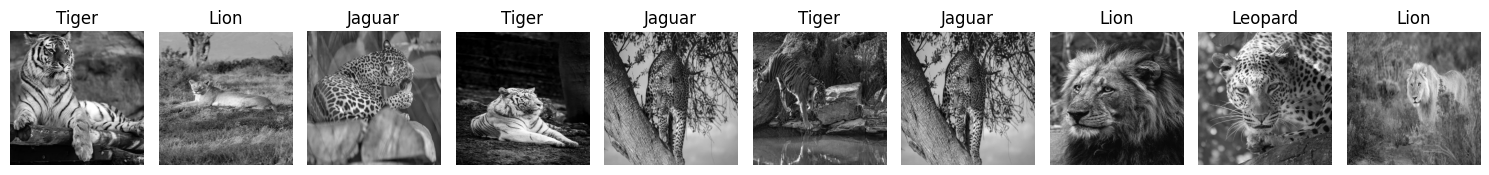

In [9]:
import matplotlib.pyplot as plt
# Function to display images with labels
def display_images(images, labels, num_images):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(int((num_images)/10), 10, i + 1)  # Create a grid of rows and columns
        plt.imshow(images[i],cmap='gray')  # Display image in grayscale
        plt.title(labels[i])  #label as title
        plt.axis('off')  # Hide axes
    plt.tight_layout()
    plt.show()

# shuffled images with labels
display_images(Animal_images, Animal_labels, 10)


In [10]:
import random
from collections import Counter
random.shuffle(train_data)#Train_data list suffled

**------------------------------------------------------------------------------------------------------------------------------------------------------------**
**Euclidean distance is a measure of the straight-line distance between two points in Euclidean space. It is the most common and familiar distance metric, often referred to as the "ordinary" distance.** Here distance d is defined as
***d = √[(x2 - x1)2 + (y2 - y1)2]***. The distance here determine the similarity of two images. The lower the distance the more similar two images are.


**------------------------------------------------------------------------------------------------------------------------------------------------------------**



In [11]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

**------------------------------------------------------------------------------------------------------------------------------------------------------------**
#Implenetation of the KNN algorithm along with the 5-fold cross validation. For each k value the 5-fold cross validation is done. Each fold contains 34 images. After calculating the distance the most common labels of the nearest neighbors are extracted. The the accuracy is predicted by compearing the most common labels with the true label.
**------------------------------------------------------------------------------------------------------------------------------------------------------------**


In [12]:
def knn(train_data, k_values):
    accuracies = []

    for k in k_values:
        folds = np.array_split(train_data, 5)

        fold_accuracies = []

        # Cross-validation
        for i in range(5):
            #The i-th fold as the validation set
            validation_set = folds[i]

            #The remaining 4 folds as the training set
            training_set = np.concatenate([folds[j] for j in range(5) if j != i])

            correct_predictions = 0

            for v in validation_set:
                distances = []
                for t in training_set:
                    d = euclidean_distance(t[0], v[0])
                    distances.append([d, t[1]])  # Store distance and label

                distances.sort()

                k_nearest_labels = [distances[j][1] for j in range(k)]  #labels of the k nearest neighbors

                # Determine the most common label
                label_counts = Counter(k_nearest_labels)
                most_common_label = max(label_counts, key=label_counts.get)

                if most_common_label == v[1]:  # Compare with true label
                    correct_predictions += 1

            accuracy = correct_predictions/ len(validation_set)
            fold_accuracies.append(accuracy)

        accuracies.append((k, fold_accuracies))

    return accuracies


In [13]:

train_data = np.array(train_data, dtype=object)
k_values = range(1, 31)


**------------------------------------------------------------------------------------------------------------------------------------------------------------**
# The accuracy is measured for each k considering the euclidian distance
**------------------------------------------------------------------------------------------------------------------------------------------------------------**


In [14]:
euclidean_accuracies = knn(train_data, k_values)
print("Printing Euclidean 5-fold accuracies for varying values of k:")
for k, fold_accuracies in euclidean_accuracies:
    for accuracy in fold_accuracies:
        print(f'k = {k}, accuracy = {accuracy:.6f}')#Accuracy values of each k

Printing Euclidean 5-fold accuracies for varying values of k:
k = 1, accuracy = 0.323529
k = 1, accuracy = 0.205882
k = 1, accuracy = 0.382353
k = 1, accuracy = 0.323529
k = 1, accuracy = 0.294118
k = 2, accuracy = 0.323529
k = 2, accuracy = 0.205882
k = 2, accuracy = 0.382353
k = 2, accuracy = 0.323529
k = 2, accuracy = 0.294118
k = 3, accuracy = 0.323529
k = 3, accuracy = 0.294118
k = 3, accuracy = 0.411765
k = 3, accuracy = 0.323529
k = 3, accuracy = 0.323529
k = 4, accuracy = 0.264706
k = 4, accuracy = 0.294118
k = 4, accuracy = 0.382353
k = 4, accuracy = 0.294118
k = 4, accuracy = 0.235294
k = 5, accuracy = 0.235294
k = 5, accuracy = 0.352941
k = 5, accuracy = 0.323529
k = 5, accuracy = 0.294118
k = 5, accuracy = 0.205882
k = 6, accuracy = 0.294118
k = 6, accuracy = 0.382353
k = 6, accuracy = 0.294118
k = 6, accuracy = 0.382353
k = 6, accuracy = 0.205882
k = 7, accuracy = 0.264706
k = 7, accuracy = 0.411765
k = 7, accuracy = 0.294118
k = 7, accuracy = 0.323529
k = 7, accuracy = 0.

**------------------------------------------------------------------------------------------------------------------------------------------------------------**
# The result is then visualized in a graph. The graph consist of k values on the *x-axis* and accuracies of each fold on the *y-axis*. The average accuracies then determined with a line connecting the centroids. *Seaborn* is used for better visual representation of the graph.
**------------------------------------------------------------------------------------------------------------------------------------------------------------**

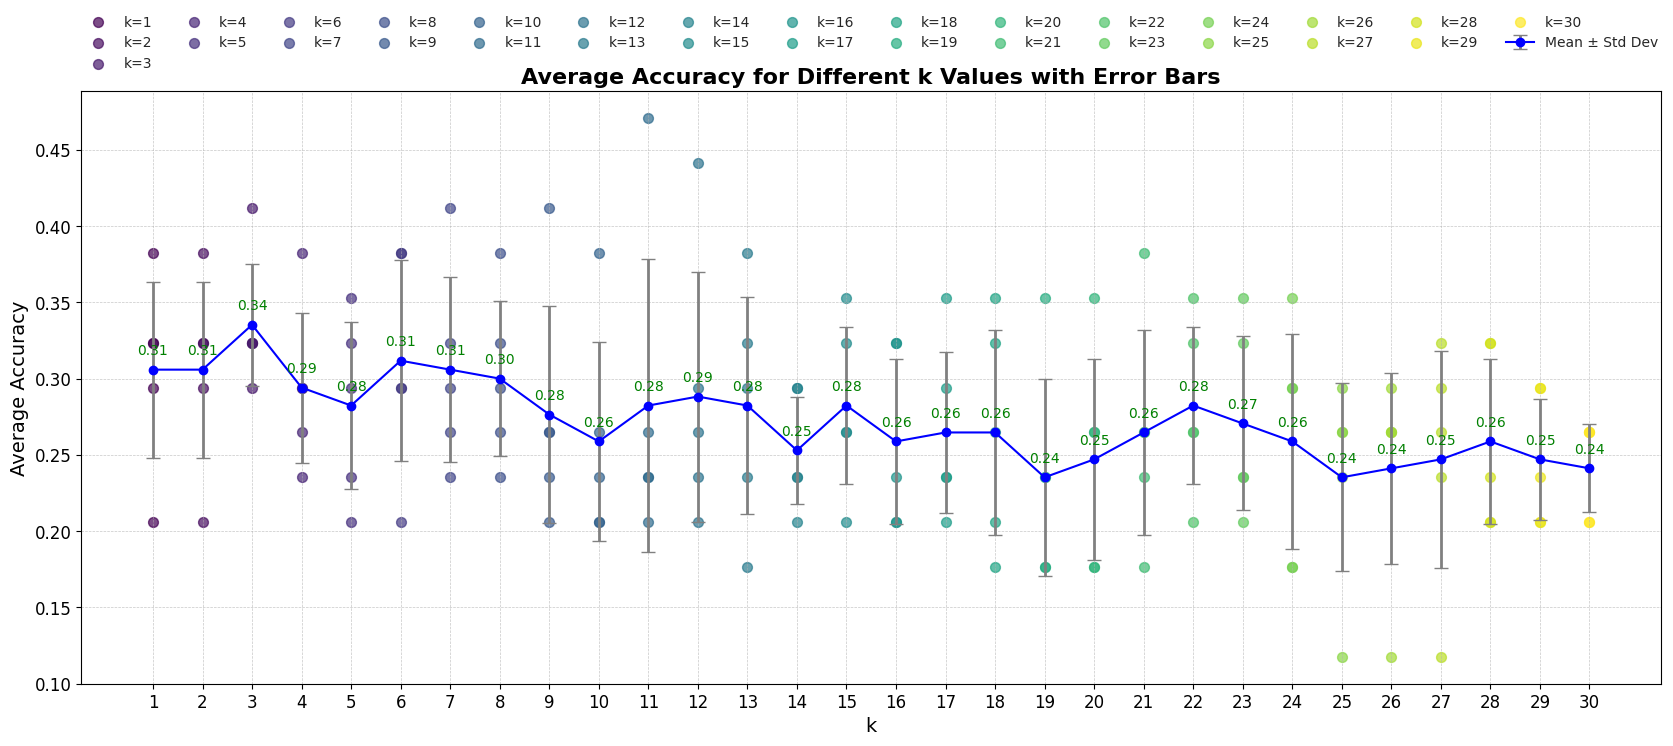

In [15]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_accuracies(euclidean_accuracies, k_values):
    plt.figure(figsize=(18, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(k_values)))  #color map for k values

    euclidean_mean_accuracies = []
    euclidean_std_accuracies = []

    for (k, fold_accuracies), color in zip(euclidean_accuracies, colors):
        #individual fold accuracies with varied colors and custom markers
        plt.scatter([k] * len(fold_accuracies), fold_accuracies, color=color, alpha=0.7, s=50, label=f'k={k}')

        mean_acc = np.mean(fold_accuracies)
        std_acc = np.std(fold_accuracies)

        euclidean_mean_accuracies.append(mean_acc)
        euclidean_std_accuracies.append(std_acc)

    #mean accuracies with error bars
    plt.errorbar(k_values, euclidean_mean_accuracies, yerr=euclidean_std_accuracies, fmt='o-',
                 color='blue', ecolor='gray', elinewidth=2, capsize=5, label='Mean ± Std Dev')


    for k, mean_acc in zip(k_values, euclidean_mean_accuracies):
        plt.text(k, mean_acc + 0.01, f'{mean_acc:.2f}', ha='center', fontsize=10, color='green')


    sns.set_style('darkgrid')  # Use a modern style
    plt.title('Average Accuracy for Different k Values with Error Bars', fontsize=16, fontweight='bold')
    plt.xlabel('k', fontsize=14)
    plt.ylabel('Average Accuracy', fontsize=14)
    plt.xticks(k_values, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12, loc='lower right')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(k_values) // 2, frameon=False)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

k_values = range(1, 31)
plot_accuracies(euclidean_accuracies, k_values)
